In [5]:
#Loading the data :
from google.colab import files
uploaded = files.upload()

Saving online exam.csv to online exam.csv


In [7]:
data = pd.read_csv('online exam.csv')
print("Data Preview:")
print(data.head())



Data Preview:
            ride_id  rideable_type               started_at  \
0  28A17ACD224CD80B  electric_bike  2024-12-06 17:50:49.428   
1  3508393A86FBD357   classic_bike  2024-12-14 11:01:00.309   
2  75FA4C03A1447401  electric_bike  2024-12-24 08:07:17.475   
3  C7741EF495C597DD   classic_bike  2024-12-19 12:48:05.452   
4  07952BB20B46C5B1  electric_bike  2024-12-17 11:19:37.631   

                  ended_at start_station_name start_station_id  \
0  2024-12-06 17:54:20.070        Oakland Ave            JC022   
1  2024-12-14 11:12:01.382        Oakland Ave            JC022   
2  2024-12-24 08:14:14.612        Oakland Ave            JC022   
3  2024-12-19 12:54:15.253        Oakland Ave            JC022   
4  2024-12-17 11:28:25.150        Oakland Ave            JC022   

                           end_station_name end_station_id  start_lat  \
0                                   Hilltop          JC019  40.737604   
1  Hoboken Terminal - Hudson St & Hudson Pl          HB101  40.7

In [8]:
print("Data info:")
print(data.info())
print(data.isnull().sum())


Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54833 entries, 0 to 54832
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ride_id             54833 non-null  object 
 1   rideable_type       54833 non-null  object 
 2   started_at          54833 non-null  object 
 3   ended_at            54833 non-null  object 
 4   start_station_name  54833 non-null  object 
 5   start_station_id    54833 non-null  object 
 6   end_station_name    54709 non-null  object 
 7   end_station_id      54667 non-null  object 
 8   start_lat           54833 non-null  float64
 9   start_lng           54833 non-null  float64
 10  end_lat             54817 non-null  float64
 11  end_lng             54817 non-null  float64
 12  member_casual       54833 non-null  object 
dtypes: float64(4), object(9)
memory usage: 5.4+ MB
None
ride_id                 0
rideable_type           0
started_at              0
ended_at  

Pandas Profiling for a univariate analysis of the variables :

In [5]:
#installing
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip -q

     - 17.9 MB 32.3 MB/s 0:00:01
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 23.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 74.5 MB/s eta 0:00:00


In [6]:

from pandas_profiling import ProfileReport
report = ProfileReport(data, title="Pandas Profiling Report")
report.to_file(output_file="report.html")


<ipython-input-6-678cde7fb7cd>:2: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
from google.colab import files
files.download('report.html')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

DATA TRANSFORMATION

In [8]:
## Checking for duplicates :
duplicates = data[data.duplicated()]
print("Duplicate Rows:")
print(duplicates)

Duplicate Rows:
Empty DataFrame
Columns: [ride_id, rideable_type, started_at, ended_at, start_station_name, start_station_id, end_station_name, end_station_id, start_lat, start_lng, end_lat, end_lng, member_casual]
Index: []


In [9]:
# Important to convert to datetime:
data['started_at'] = pd.to_datetime(data['started_at'])

# hourly intervals
data['hour'] = data['started_at'].dt.floor('H')  # Floor timestamps to the nearest hour

data[['started_at', 'hour']].head()


<ipython-input-9-444afceb252c>:5: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  data['hour'] = data['started_at'].dt.floor('H')  # Floor timestamps to the nearest hour


,started_at,hour
0,2024-12-06 17:50:49.428,2024-12-06 17:00:00
1,2024-12-14 11:01:00.309,2024-12-14 11:00:00
2,2024-12-24 08:07:17.475,2024-12-24 08:00:00
3,2024-12-19 12:48:05.452,2024-12-19 12:00:00
4,2024-12-17 11:19:37.631,2024-12-17 11:00:00


In [11]:
## Creating the new data :


hourly_demand = data.groupby(['start_station_id', 'start_station_name', 'hour']).size().reset_index(name='hourly_demand')

bike_demand = data.groupby(['start_station_id', 'start_station_name', 'hour', 'rideable_type']).size().reset_index(name='demand')
bike_demand_pivot = bike_demand.pivot_table(index=['start_station_id', 'start_station_name', 'hour'],
                                            columns='rideable_type',
                                            values='demand',
                                            fill_value=0).reset_index()
bike_demand_pivot.rename(columns={
    'classic_bike': 'classic_bike_demand',
    'electric_bike': 'electric_bike_demand'
}, inplace=True)

member_demand = data.groupby(['start_station_id', 'start_station_name', 'hour', 'member_casual']).size().reset_index(name='demand')
member_demand_pivot = member_demand.pivot_table(index=['start_station_id', 'start_station_name', 'hour'],
                                                columns='member_casual',
                                                values='demand',
                                                fill_value=0).reset_index()
member_demand_pivot.rename(columns={
    'member': 'member_demand',
    'casual': 'casual_demand'
}, inplace=True)


final_data = pd.merge(hourly_demand, bike_demand_pivot, on=['start_station_id', 'start_station_name', 'hour'], how='left')
final_data = pd.merge(final_data, member_demand_pivot, on=['start_station_id', 'start_station_name', 'hour'], how='left')


station_locations = data[['start_station_id', 'start_station_name', 'start_lat', 'start_lng']].drop_duplicates()
final_data = pd.merge(final_data, station_locations, on=['start_station_id', 'start_station_name'], how='left')


final_data['hour_of_day'] = final_data['hour'].dt.hour
final_data['day_of_week'] = final_data['hour'].dt.dayofweek
final_data['is_weekend'] = final_data['day_of_week'].isin([5, 6]).astype(int)
final_data['day_of_week_name'] = final_data['hour'].dt.strftime('%A')


final_data['next_hour_demand'] = final_data.groupby('start_station_id')['hourly_demand'].shift(-1)


final_data = final_data.dropna(subset=['next_hour_demand'])


final_data.to_csv('/content/drive/MyDrive/final_data.csv', index=False)  # Google Drive


final_data.head(n = 50)


,start_station_id,start_station_name,hour,hourly_demand,classic_bike_demand,electric_bike_demand,casual_demand,member_demand,start_lat,start_lng,hour_of_day,day_of_week,is_weekend,day_of_week_name,next_hour_demand
0,HB101,Hoboken Terminal - Hudson St & Hudson Pl,2024-12-01 00:00:00,3,0.0,3.0,0.0,3.0,40.735938,-74.030305,0,6,1,Sunday,3.0
1,HB101,Hoboken Terminal - Hudson St & Hudson Pl,2024-12-01 01:00:00,3,0.0,3.0,1.0,2.0,40.735938,-74.030305,1,6,1,Sunday,1.0
2,HB101,Hoboken Terminal - Hudson St & Hudson Pl,2024-12-01 02:00:00,1,0.0,1.0,0.0,1.0,40.735938,-74.030305,2,6,1,Sunday,1.0
3,HB101,Hoboken Terminal - Hudson St & Hudson Pl,2024-12-01 03:00:00,1,0.0,1.0,1.0,0.0,40.735938,-74.030305,3,6,1,Sunday,3.0
4,HB101,Hoboken Terminal - Hudson St & Hudson Pl,2024-12-01 10:00:00,3,1.0,2.0,1.0,2.0,40.735938,-74.030305,10,6,1,Sunday,1.0
5,HB101,Hoboken Terminal - Hudson St & Hudson Pl,2024-12-01 12:00:00,1,0.0,1.0,0.0,1.0,40.735938,-74.030305,12,6,1,Sunday,3.0
6,HB101,Hoboken Terminal - Hudson St & Hudson Pl,2024-12-01 13:00:00,3,0.0,3.0,1.0,2.0,40.735938,-74.030305,13,6,1,Sunday,1.0
7,HB101,Hoboken Terminal - Hudson St & Hudson Pl,2024-12-01 14:00:00,1,0.0,1.0,0.0,1.0,40.735938,-74.030305,14,6,1,Sunday,4.0
8,HB101,Hoboken Terminal - Hudson St & Hudson Pl,2024-12-01 15:00:00,4,0.0,4.0,2.0,2.0,40.735938,-74.030305,15,6,1,Sunday,5.0
9,HB101,Hoboken Terminal - Hudson St & Hudson Pl,2024-12-01 17:00:00,5,1.0,4.0,2.0,3.0,40.735938,-74.030305,17,6,1,Sunday,2.0


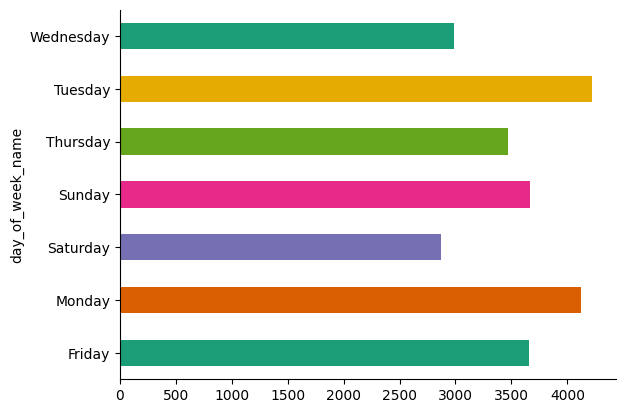

In [25]:
# @title day_of_week_name

from matplotlib import pyplot as plt
import seaborn as sns
final_data.groupby('day_of_week_name').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [24]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=final_data)

https://docs.google.com/spreadsheets/d/1JPPeZQK3Ze0xyHXrj8IIFwDOL47D9QUwgUbfVppbTPo#gid=0


In [26]:
pip install holidays


In [23]:
import holidays

## adding holiday variable :
us_holidays = holidays.US()


final_data['is_holiday'] = final_data['hour'].dt.date.apply(lambda x: 1 if x in us_holidays else 0)

final_data.head()


,start_station_id,start_station_name,hour,hourly_demand,classic_bike_demand,electric_bike_demand,casual_demand,member_demand,start_lat,start_lng,hour_of_day,day_of_week,is_weekend,day_of_week_name,next_hour_demand,is_peak_hour,is_holiday
0,HB101,Hoboken Terminal - Hudson St & Hudson Pl,2024-12-01 00:00:00,3,0.0,3.0,0.0,3.0,40.735938,-74.030305,0,6,1,Sunday,3.0,0,0
1,HB101,Hoboken Terminal - Hudson St & Hudson Pl,2024-12-01 01:00:00,3,0.0,3.0,1.0,2.0,40.735938,-74.030305,1,6,1,Sunday,1.0,0,0
2,HB101,Hoboken Terminal - Hudson St & Hudson Pl,2024-12-01 02:00:00,1,0.0,1.0,0.0,1.0,40.735938,-74.030305,2,6,1,Sunday,1.0,0,0
3,HB101,Hoboken Terminal - Hudson St & Hudson Pl,2024-12-01 03:00:00,1,0.0,1.0,1.0,0.0,40.735938,-74.030305,3,6,1,Sunday,3.0,0,0
4,HB101,Hoboken Terminal - Hudson St & Hudson Pl,2024-12-01 10:00:00,3,1.0,2.0,1.0,2.0,40.735938,-74.030305,10,6,1,Sunday,1.0,0,0


In [22]:
final_data['hour'] = pd.to_datetime(final_data['hour'])

In [14]:
# Getting unique station names
unique_station_names = data['start_station_name'].unique()


print(unique_station_names)


['Oakland Ave' 'South Waterfront Walkway - Sinatra Dr & 1 St'
 'Baldwin at Montgomery' '6 St & Grand St'
 'Mama Johnson Field - 4 St & Jackson St' 'Leonard Gordon Park'
 'Columbus Drive' 'Heights Elevator' 'Hilltop'
 'Stevens - River Ter & 6 St' 'Harborside' 'Christ Hospital'
 '14 St Ferry - 14 St & Shipyard Ln' 'Clinton St & Newark St'
 'Van Vorst Park' 'Hoboken Ave at Monmouth St' 'Exchange Pl'
 'Madison St & 10 St' 'Manila & 1st' 'Riverview Park' 'Brunswick St'
 'Newport PATH' 'Grant Ave & MLK Dr' 'Grove St PATH' '2 St & Park Ave'
 'Montgomery St' 'Newark Ave' 'Brunswick & 6th' '4 St & River St'
 'Marshall St & 2 St' 'Willow Ave & 12 St' 'Jersey & 3rd'
 'Hoboken Terminal - Hudson St & Hudson Pl'
 'Church Sq Park - 5 St & Park Ave' '7 St & Monroe St' 'Fairmount Ave'
 '11 St & Washington St' 'Bergen Ave & Sip Ave' 'Marin Light Rail'
 'Dixon Mills' 'Warren St' 'Journal Square' 'Bergen Ave' 'Glenwood Ave'
 'Liberty Light Rail' 'Hoboken Terminal - River St & Hudson Pl'
 'Paulus Hook' 'Ha

In [15]:
# Checking if all station coordinates fall within NYC boundaries
is_in_nyc = (data['start_lat'].between(40.4774, 40.9176)) & (data['start_lng'].between(-74.2591, -73.7002))
print(f"All stations in NYC: {is_in_nyc.all()}")


All stations in NYC: True


EDA


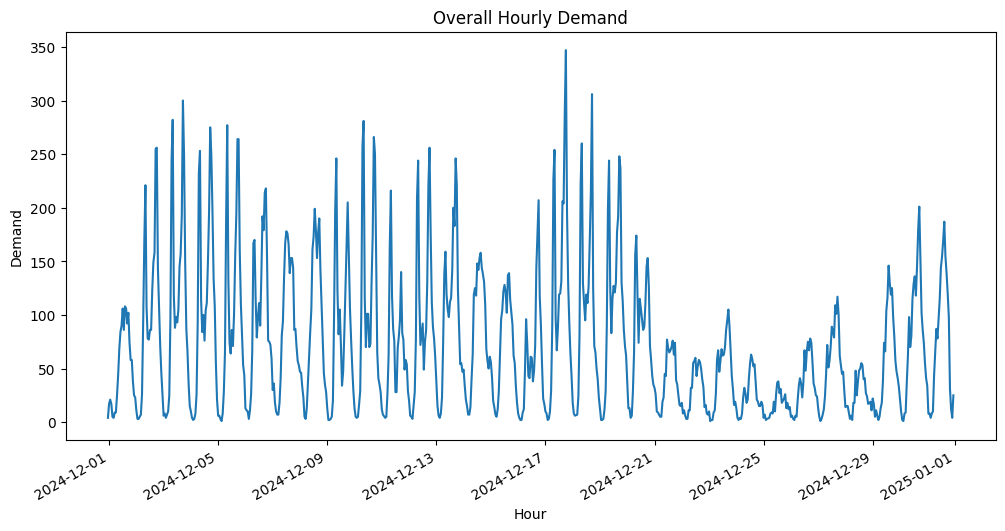

In [30]:
import matplotlib.pyplot as plt

# Plot overall demand trends
plt.figure(figsize=(12, 6))
final_data.groupby('hour')['hourly_demand'].sum().plot()
plt.title('Overall Hourly Demand')
plt.ylabel('Demand')
plt.xlabel('Hour')
plt.show()


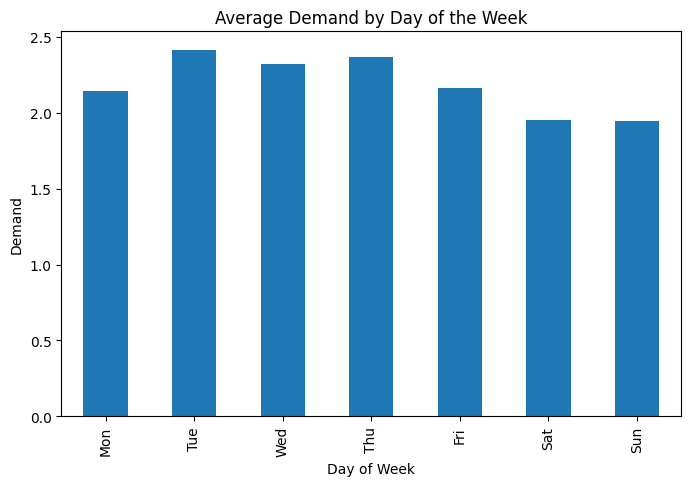

In [31]:
plt.figure(figsize=(8, 5))
final_data.groupby('day_of_week')['hourly_demand'].mean().plot(kind='bar')
plt.title('Average Demand by Day of the Week')
plt.ylabel('Demand')
plt.xlabel('Day of Week')
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()


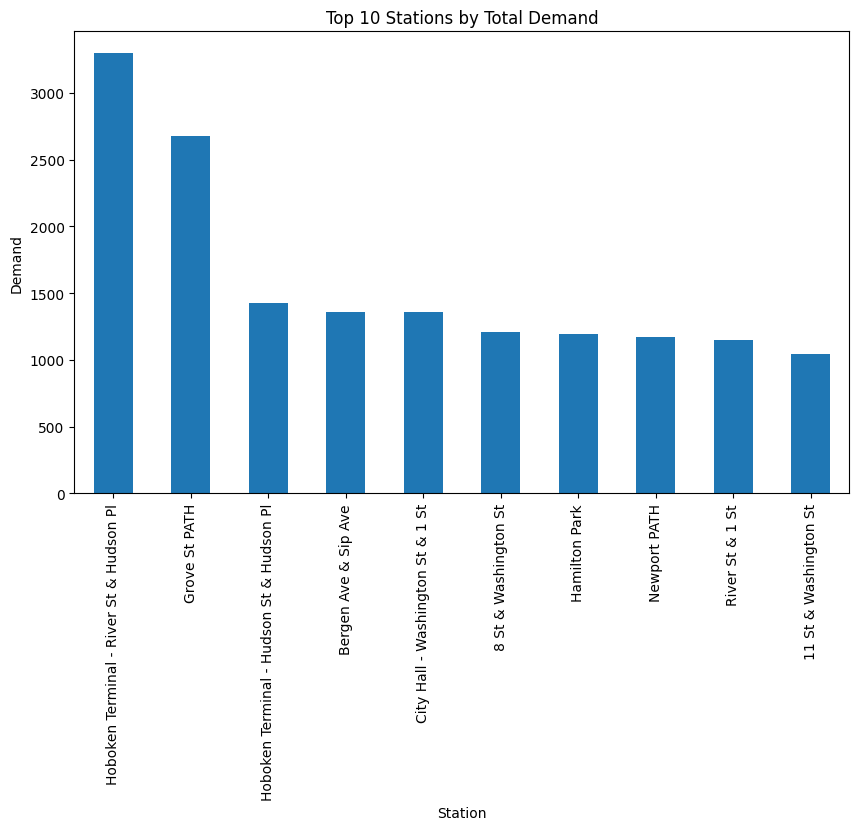

In [32]:
top_stations = final_data.groupby('start_station_name')['hourly_demand'].sum().sort_values(ascending=False).head(10)
top_stations.plot(kind='bar', figsize=(10, 6))
plt.title('Top 10 Stations by Total Demand')
plt.ylabel('Demand')
plt.xlabel('Station')
plt.show()


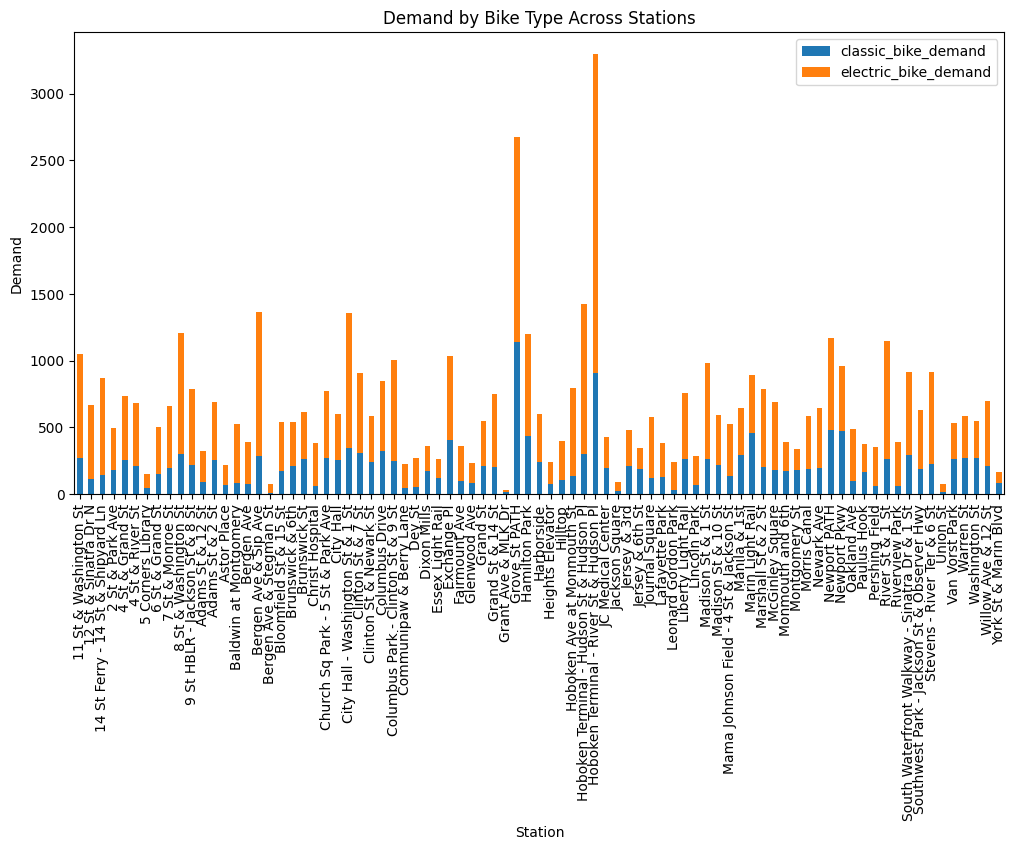

In [33]:
top_bike_types = final_data.groupby(['start_station_name'])[['classic_bike_demand', 'electric_bike_demand']].sum()
top_bike_types.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Demand by Bike Type Across Stations')
plt.ylabel('Demand')
plt.xlabel('Station')
plt.show()


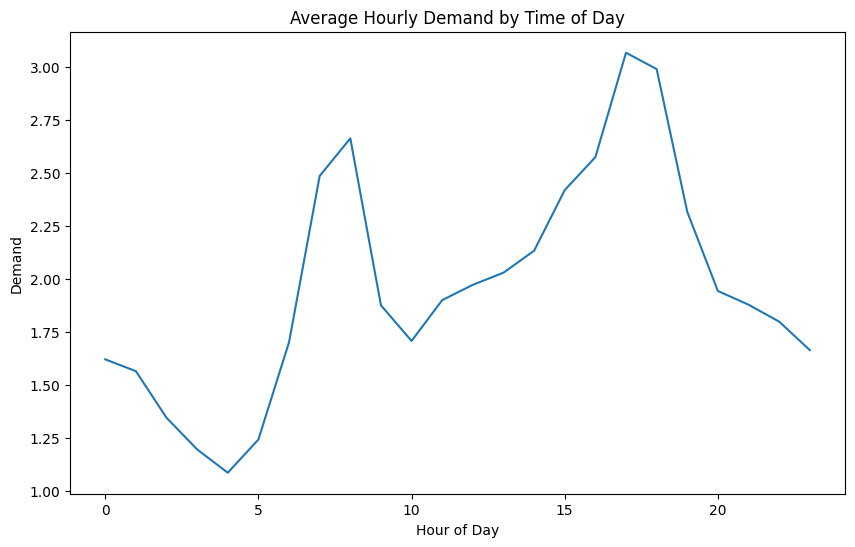

In [34]:
final_data.groupby('hour_of_day')['hourly_demand'].mean().plot(kind='line', figsize=(10, 6))
plt.title('Average Hourly Demand by Time of Day')
plt.ylabel('Demand')
plt.xlabel('Hour of Day')
plt.show()


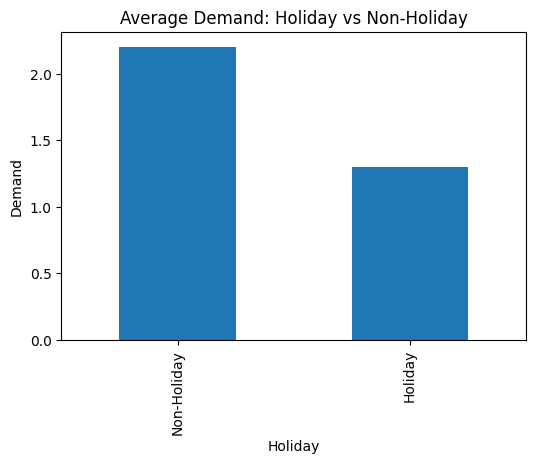

In [35]:
final_data.groupby('is_holiday')['hourly_demand'].mean().plot(kind='bar', figsize=(6, 4))
plt.title('Average Demand: Holiday vs Non-Holiday')
plt.ylabel('Demand')
plt.xlabel('Holiday')
plt.xticks(ticks=[0, 1], labels=['Non-Holiday', 'Holiday'])
plt.show()


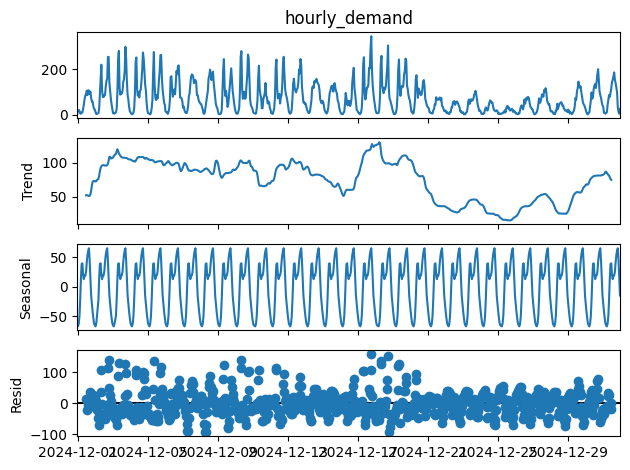

In [36]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decomposing the overall demand
decomposition = seasonal_decompose(final_data.groupby('hour')['hourly_demand'].sum(), model='additive', period=24)
decomposition.plot()
plt.show()


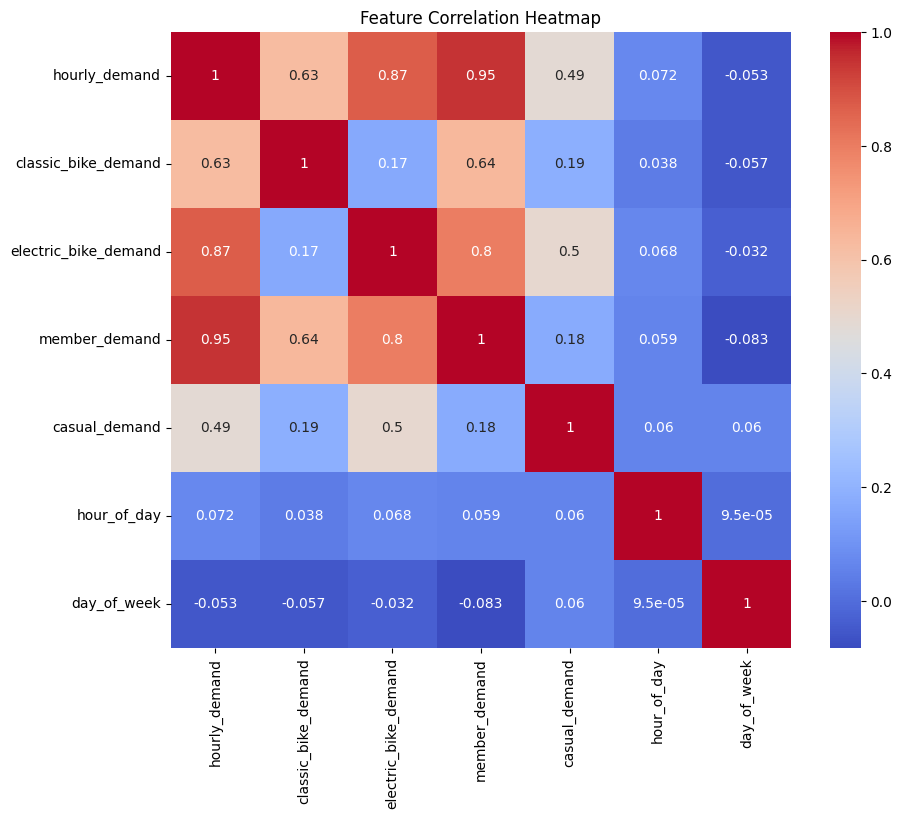

In [37]:
import seaborn as sns

corr_data = final_data[['hourly_demand', 'classic_bike_demand', 'electric_bike_demand',
                        'member_demand', 'casual_demand', 'hour_of_day', 'day_of_week']]

plt.figure(figsize=(10, 8))
sns.heatmap(corr_data.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()


[Text(0.5, 1.0, 'Hourly Demand by Day of the Week')]

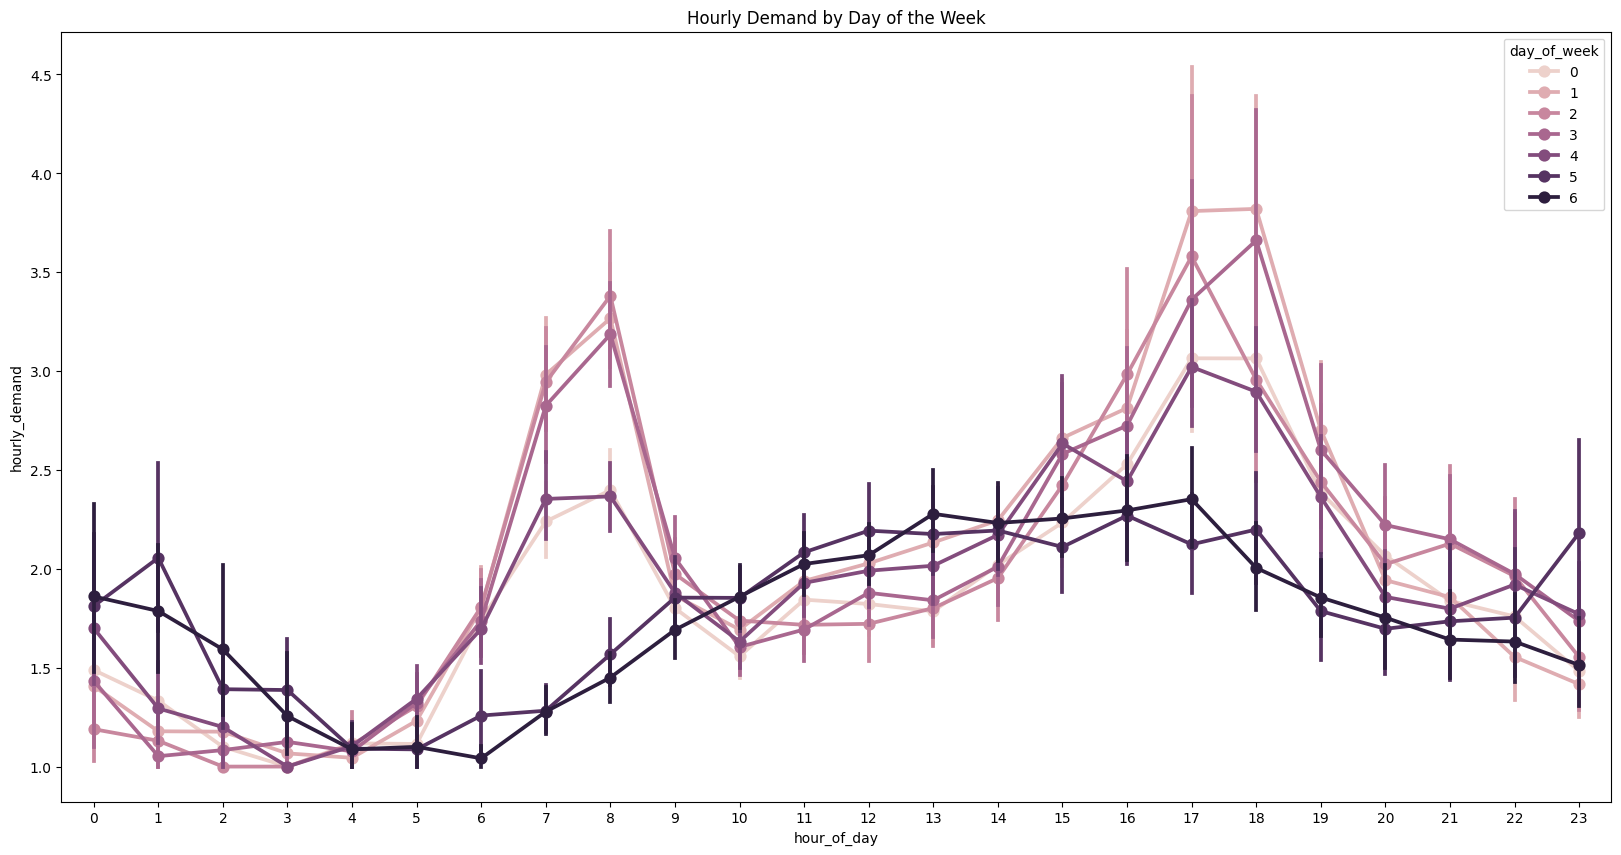

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize=(20,10))
sns.pointplot(data=final_data, x='hour_of_day', y='hourly_demand', hue='day_of_week', ax=ax)
ax.set(title="Hourly Demand by Day of the Week")

[Text(0.5, 1.0, 'casual Demand by Day of the Week')]

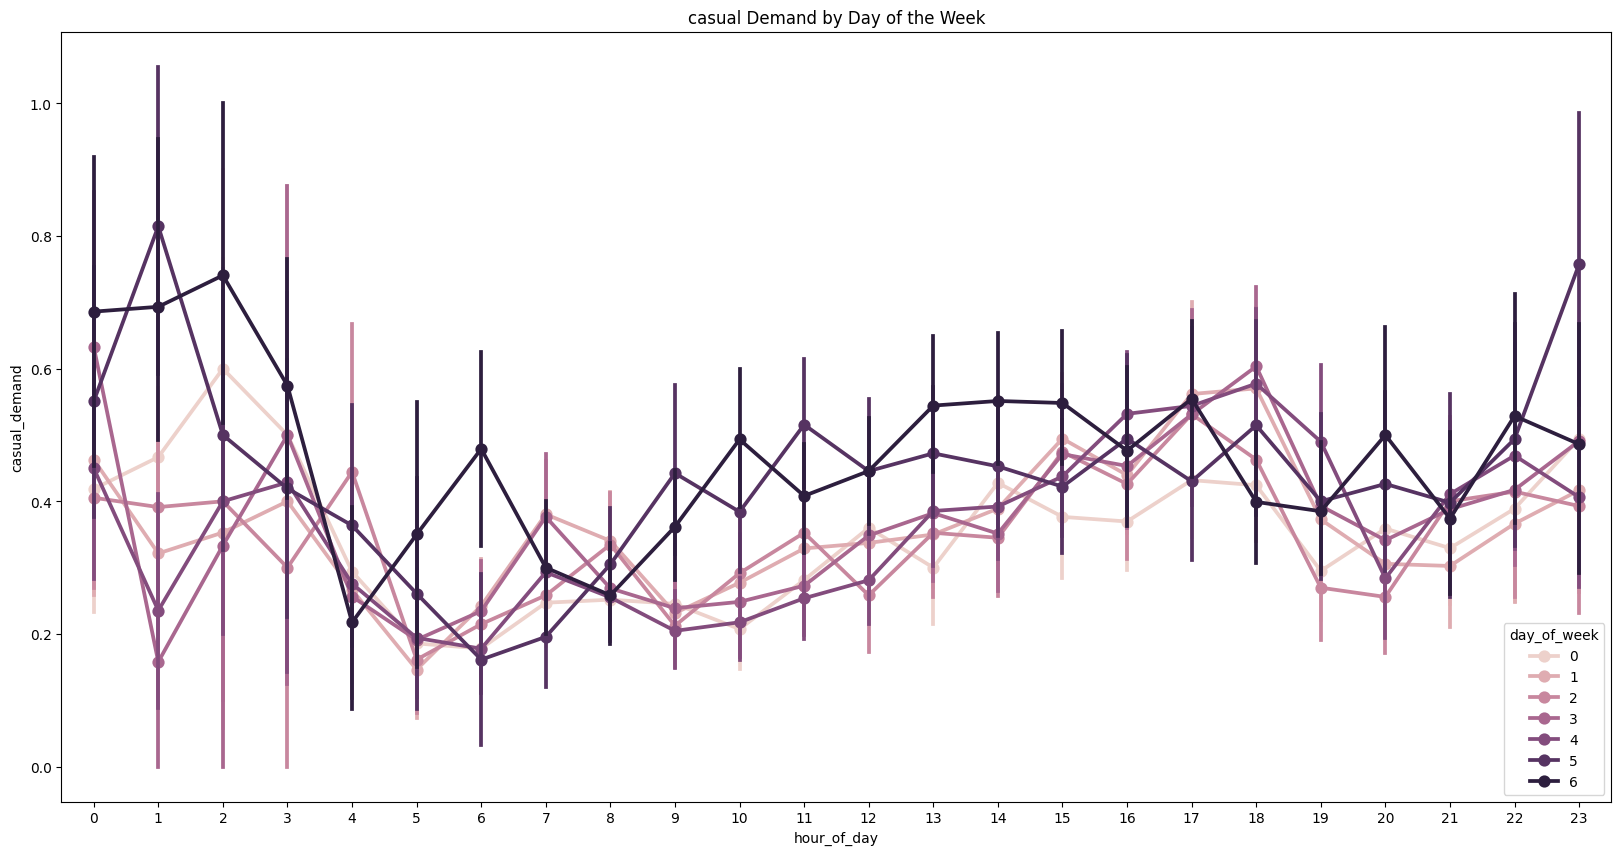

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize=(20,10))
sns.pointplot(data=final_data, x='hour_of_day', y='casual_demand', hue='day_of_week', ax=ax)
ax.set(title="casual Demand by Day of the Week")

[Text(0.5, 1.0, 'members Demand by Day of the Week')]

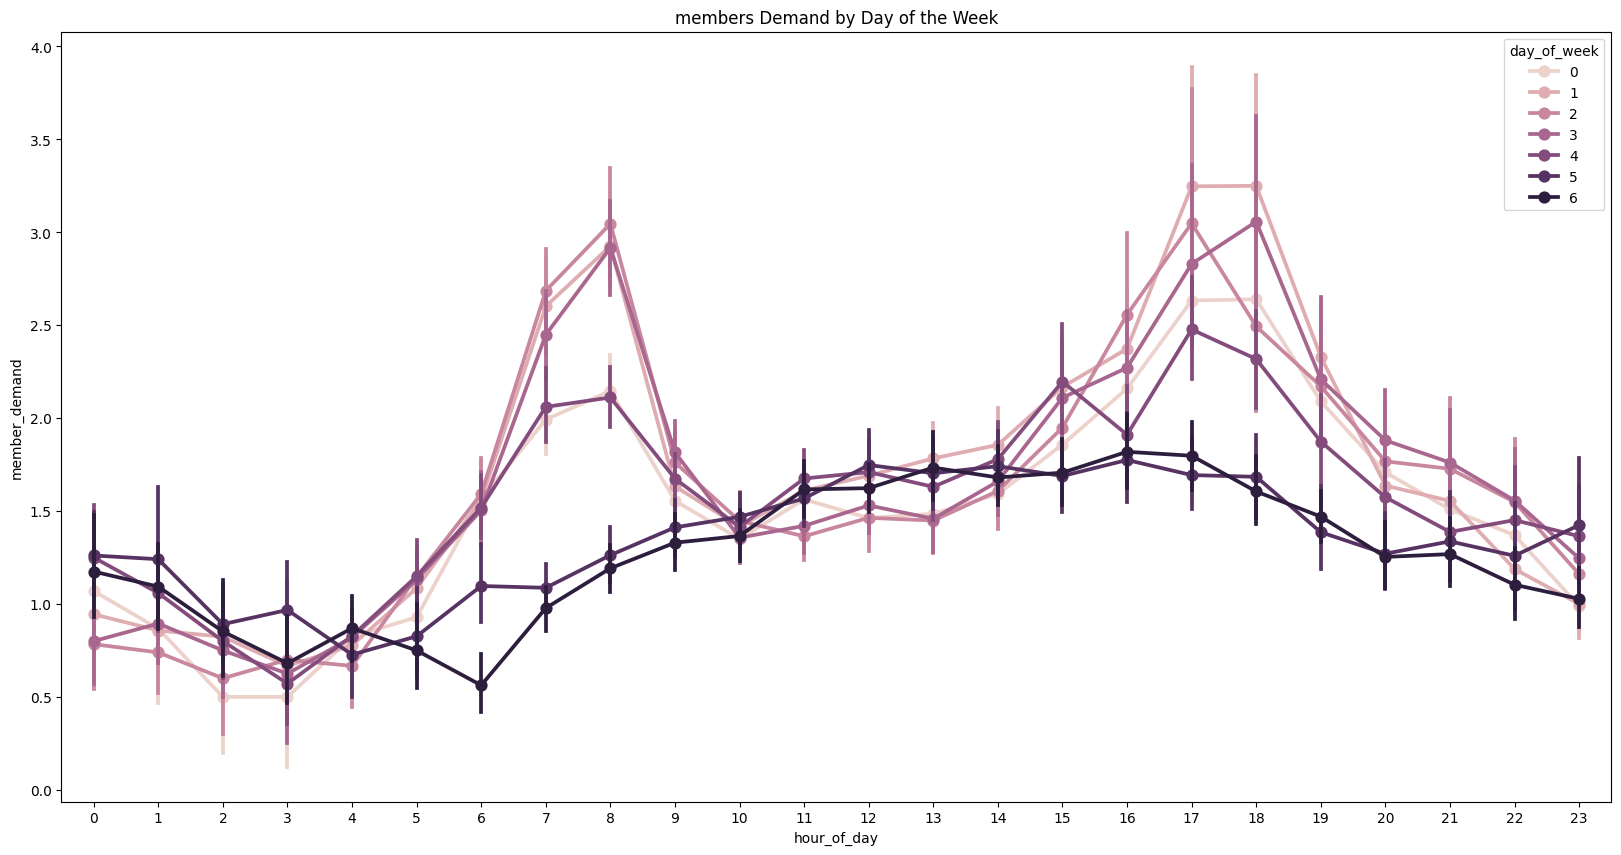

In [7]:
fig, ax = plt.subplots(figsize=(20,10))
sns.pointplot(data=final_data, x='hour_of_day', y='member_demand', hue='day_of_week', ax=ax)
ax.set(title="members Demand by Day of the Week")

In [8]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
import pandas as pd

file_path = '/content/drive/MyDrive/final_data.csv'
final_data = pd.read_csv(file_path)


print(final_data.head())


  start_station_id                        start_station_name  \
0            HB101  Hoboken Terminal - Hudson St & Hudson Pl   
1            HB101  Hoboken Terminal - Hudson St & Hudson Pl   
2            HB101  Hoboken Terminal - Hudson St & Hudson Pl   
3            HB101  Hoboken Terminal - Hudson St & Hudson Pl   
4            HB101  Hoboken Terminal - Hudson St & Hudson Pl   

                  hour  hourly_demand  classic_bike_demand  \
0  2024-12-01 00:00:00              3                  0.0   
1  2024-12-01 01:00:00              3                  0.0   
2  2024-12-01 02:00:00              1                  0.0   
3  2024-12-01 03:00:00              1                  0.0   
4  2024-12-01 10:00:00              3                  1.0   

   electric_bike_demand  casual_demand  member_demand  start_lat  start_lng  \
0                   3.0            0.0            3.0  40.735938 -74.030305   
1                   3.0            1.0            2.0  40.735938 -74.030305   
2    

In [21]:
# Add a peak hour variable
final_data['is_peak_hour'] = final_data['hour_of_day'].apply(lambda x: 1 if 7 <= x <= 9 or 16 <= x <= 18 else 0)
final_data.head(n = 10)

,start_station_id,start_station_name,hour,hourly_demand,classic_bike_demand,electric_bike_demand,casual_demand,member_demand,start_lat,start_lng,hour_of_day,day_of_week,is_weekend,day_of_week_name,next_hour_demand,is_peak_hour
0,HB101,Hoboken Terminal - Hudson St & Hudson Pl,2024-12-01 00:00:00,3,0.0,3.0,0.0,3.0,40.735938,-74.030305,0,6,1,Sunday,3.0,0
1,HB101,Hoboken Terminal - Hudson St & Hudson Pl,2024-12-01 01:00:00,3,0.0,3.0,1.0,2.0,40.735938,-74.030305,1,6,1,Sunday,1.0,0
2,HB101,Hoboken Terminal - Hudson St & Hudson Pl,2024-12-01 02:00:00,1,0.0,1.0,0.0,1.0,40.735938,-74.030305,2,6,1,Sunday,1.0,0
3,HB101,Hoboken Terminal - Hudson St & Hudson Pl,2024-12-01 03:00:00,1,0.0,1.0,1.0,0.0,40.735938,-74.030305,3,6,1,Sunday,3.0,0
4,HB101,Hoboken Terminal - Hudson St & Hudson Pl,2024-12-01 10:00:00,3,1.0,2.0,1.0,2.0,40.735938,-74.030305,10,6,1,Sunday,1.0,0
5,HB101,Hoboken Terminal - Hudson St & Hudson Pl,2024-12-01 12:00:00,1,0.0,1.0,0.0,1.0,40.735938,-74.030305,12,6,1,Sunday,3.0,0
6,HB101,Hoboken Terminal - Hudson St & Hudson Pl,2024-12-01 13:00:00,3,0.0,3.0,1.0,2.0,40.735938,-74.030305,13,6,1,Sunday,1.0,0
7,HB101,Hoboken Terminal - Hudson St & Hudson Pl,2024-12-01 14:00:00,1,0.0,1.0,0.0,1.0,40.735938,-74.030305,14,6,1,Sunday,4.0,0
8,HB101,Hoboken Terminal - Hudson St & Hudson Pl,2024-12-01 15:00:00,4,0.0,4.0,2.0,2.0,40.735938,-74.030305,15,6,1,Sunday,5.0,0
9,HB101,Hoboken Terminal - Hudson St & Hudson Pl,2024-12-01 17:00:00,5,1.0,4.0,2.0,3.0,40.735938,-74.030305,17,6,1,Sunday,2.0,1


In [25]:
print(final_data.isnull().sum())
final_data = final_data.dropna()



start_station_id        0
start_station_name      0
hour                    0
hourly_demand           0
classic_bike_demand     0
electric_bike_demand    0
casual_demand           0
member_demand           0
start_lat               0
start_lng               0
is_weekend              0
day_of_week_name        0
next_hour_demand        0
is_peak_hour            0
is_holiday              0
day_sin                 0
day_cos                 0
hour_sin                0
hour_cos                0
dtype: int64


In [11]:
## peak hours statistics
peak_hour_stats = final_data.groupby('is_peak_hour').agg(
    total_demand=('hourly_demand', 'sum'),
    mean_demand=('hourly_demand', 'mean'),
    median_demand=('hourly_demand', 'median'),
    count=('hourly_demand', 'count')
).reset_index()

print(peak_hour_stats)


   is_peak_hour  total_demand  mean_demand  median_demand  count
0             0         30469     1.939465            1.0  15710
1             1         24229     2.631299            2.0   9208


In [24]:
import numpy as np

final_data['day_sin'] = np.sin(2 * np.pi * final_data['day_of_week'] / 7)
final_data['day_cos'] = np.cos(2 * np.pi * final_data['day_of_week'] / 7)

final_data['hour_sin'] = np.sin(2 * np.pi * final_data['hour_of_day'] / 24)
final_data['hour_cos'] = np.cos(2 * np.pi * final_data['hour_of_day'] / 24)

final_data = final_data.drop(columns=['day_of_week', 'hour_of_day'])


print(final_data.head())


  start_station_id                        start_station_name  \
0            HB101  Hoboken Terminal - Hudson St & Hudson Pl   
1            HB101  Hoboken Terminal - Hudson St & Hudson Pl   
2            HB101  Hoboken Terminal - Hudson St & Hudson Pl   
3            HB101  Hoboken Terminal - Hudson St & Hudson Pl   
4            HB101  Hoboken Terminal - Hudson St & Hudson Pl   

                 hour  hourly_demand  classic_bike_demand  \
0 2024-12-01 00:00:00              3                  0.0   
1 2024-12-01 01:00:00              3                  0.0   
2 2024-12-01 02:00:00              1                  0.0   
3 2024-12-01 03:00:00              1                  0.0   
4 2024-12-01 10:00:00              3                  1.0   

   electric_bike_demand  casual_demand  member_demand  start_lat  start_lng  \
0                   3.0            0.0            3.0  40.735938 -74.030305   
1                   3.0            1.0            2.0  40.735938 -74.030305   
2          

cyclical encoding

TARGET ENCODING

In [31]:

station_target_encoding_train = train_data.groupby('start_station_id')['next_hour_demand'].mean()


X_train['station_id_encoded'] = X_train['start_station_id'].map(station_target_encoding_train)
X_val['station_id_encoded'] = X_val['start_station_id'].map(station_target_encoding_train)
X_test['station_id_encoded'] = X_test['start_station_id'].map(station_target_encoding_train)

overall_mean = train_data['next_hour_demand'].mean()
X_val['station_id_encoded'].fillna(overall_mean, inplace=True)
X_test['station_id_encoded'].fillna(overall_mean, inplace=True)

X_train = X_train.drop(columns=['start_station_id'])
X_val = X_val.drop(columns=['start_station_id'])
X_test = X_test.drop(columns=['start_station_id'])


<ipython-input-31-cfddc0906754>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_val['station_id_encoded'].fillna(overall_mean, inplace=True)
<ipython-input-31-cfddc0906754>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

In [32]:
print(X_train.head())
print(X_val.head())
print(X_test.head())


   hourly_demand  classic_bike_demand  electric_bike_demand  casual_demand  \
0              3                  0.0                   3.0            0.0   
1              3                  0.0                   3.0            1.0   
2              1                  0.0                   1.0            0.0   
3              1                  0.0                   1.0            1.0   
4              3                  1.0                   2.0            1.0   

   member_demand  start_lat  start_lng  is_weekend  is_peak_hour  is_holiday  \
0            3.0  40.735938 -74.030305           1             0           0   
1            2.0  40.735938 -74.030305           1             0           0   
2            1.0  40.735938 -74.030305           1             0           0   
3            0.0  40.735938 -74.030305           1             0           0   
4            2.0  40.735938 -74.030305           1             0           0   

    day_sin  day_cos  hour_sin  hour_cos  station_

FEATURE IMPORTANCE

Feature ranking:
1. feature hourly_demand (0.17358598110733287)
2. feature electric_bike_demand (0.12957263792327406)
3. feature member_demand (0.09359204185906328)
4. feature hour_sin (0.09114586131396128)
5. feature hour_cos (0.08947525376179122)
6. feature day_sin (0.07516566945753662)
7. feature start_station_id_HB102 (0.049681054261942505)
8. feature start_lng (0.04743248148851145)
9. feature classic_bike_demand (0.04077399540192675)
10. feature day_cos (0.03805992231245037)
11. feature start_lat (0.03799029688856351)
12. feature casual_demand (0.032405494778536686)
13. feature is_peak_hour (0.010678119964754786)
14. feature is_weekend (0.008131223611843765)
15. feature start_station_id_HB101 (0.0052529122210014855)
16. feature start_station_id_JC009 (0.005210616638349436)
17. feature start_station_id_HB603 (0.004306160276820847)
18. feature start_station_id_HB609 (0.0037078841527232974)
19. feature start_station_id_HB402 (0.0031870054605394535)
20. feature start_station_id_HB501 

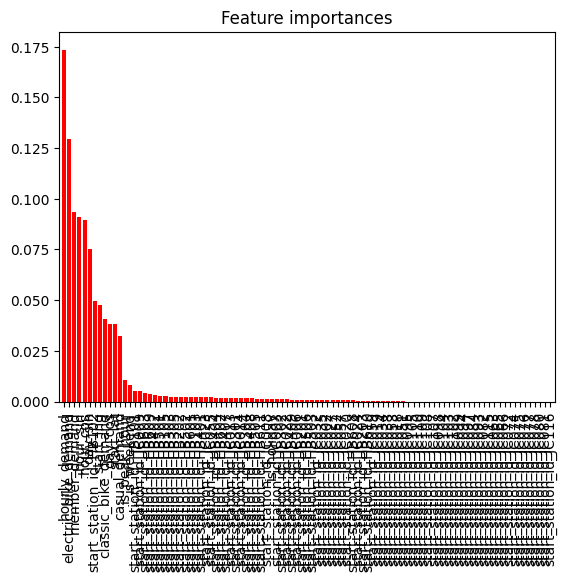

In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

importances = model.feature_importances_
indices = np.argsort(importances)[::-1]


print("Feature ranking:")
for f in range(X_train.shape[1]):
    print(f"{f + 1}. feature {X_train.columns[indices[f]]} ({importances[indices[f]]})")


import matplotlib.pyplot as plt

plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices], color="r", align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()


In [26]:
final_data = final_data.drop(['start_station_name' , 'hour', 'day_of_week_name'], axis=1)


One hot encoding

In [8]:
import pandas as pd

final_data = pd.get_dummies(final_data, columns=['start_station_id'])
final_data = final_data.astype(float)

In [27]:
print(final_data.dtypes)
print(final_data.head())

start_station_id         object
hourly_demand             int64
classic_bike_demand     float64
electric_bike_demand    float64
casual_demand           float64
member_demand           float64
start_lat               float64
start_lng               float64
is_weekend                int64
next_hour_demand        float64
is_peak_hour              int64
is_holiday                int64
day_sin                 float64
day_cos                 float64
hour_sin                float64
hour_cos                float64
dtype: object


Splitting the data

In [28]:

train_split = int(0.7 * len(final_data))  # 70% training
val_split = int(0.9 * len(final_data))    # 20% validation, 10% test


train_data = final_data.iloc[:train_split]
val_data = final_data.iloc[train_split:val_split]
test_data = final_data.iloc[val_split:]


In [29]:

target_col = 'next_hour_demand'

X_train = train_data.drop(columns=[target_col])
y_train = train_data[target_col]

X_val = val_data.drop(columns=[target_col])
y_val = val_data[target_col]

X_test = test_data.drop(columns=[target_col])
y_test = test_data[target_col]


In [33]:
from sklearn.preprocessing import MinMaxScaler
## Scaling
numerical_features = ['hourly_demand', 'classic_bike_demand', 'electric_bike_demand',
                      'member_demand', 'casual_demand', 'start_lat', 'start_lng' , 'station_id_encoded']


scaler = MinMaxScaler()


X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])

X_val[numerical_features] = scaler.transform(X_val[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])


In [34]:
X_train.head()

,hourly_demand,classic_bike_demand,electric_bike_demand,casual_demand,member_demand,start_lat,start_lng,is_weekend,is_peak_hour,is_holiday,day_sin,day_cos,hour_sin,hour_cos,station_id_encoded
0,0.044444,0.000000,0.081081,0.0,0.071429,0.570492,0.894591,1,0,0,-0.781831,0.62349,0.000000,1.000000,0.408803
1,0.044444,0.000000,0.081081,0.1,0.047619,0.570492,0.894591,1,0,0,-0.781831,0.62349,0.258819,0.965926,0.408803
2,0.000000,0.000000,0.027027,0.0,0.023810,0.570492,0.894591,1,0,0,-0.781831,0.62349,0.500000,0.866025,0.408803
3,0.000000,0.000000,0.027027,0.1,0.000000,0.570492,0.894591,1,0,0,-0.781831,0.62349,0.707107,0.707107,0.408803
4,0.044444,0.055556,0.054054,0.1,0.047619,0.570492,0.894591,1,0,0,-0.781831,0.62349,0.500000,-0.866025,0.408803


In [35]:
X_test.head()

,hourly_demand,classic_bike_demand,electric_bike_demand,casual_demand,member_demand,start_lat,start_lng,is_weekend,is_peak_hour,is_holiday,day_sin,day_cos,hour_sin,hour_cos,station_id_encoded
22426,0.022222,0.055556,0.027027,0.0,0.047619,0.518108,0.354573,0,0,0,0.433884,-0.900969,-0.707107,0.707107,0.211828
22427,0.000000,0.055556,0.000000,0.0,0.023810,0.518108,0.354573,0,0,0,0.433884,-0.900969,-0.500000,0.866025,0.211828
22428,0.044444,0.111111,0.027027,0.0,0.071429,0.518108,0.354573,0,0,0,0.433884,-0.900969,-0.258819,0.965926,0.211828
22429,0.000000,0.055556,0.000000,0.0,0.023810,0.518108,0.354573,0,0,0,-0.433884,-0.900969,0.866025,0.500000,0.211828
22430,0.000000,0.000000,0.027027,0.0,0.023810,0.518108,0.354573,0,1,0,-0.433884,-0.900969,0.866025,-0.500000,0.211828


CREATING THE SEQUENCES

In [36]:
import numpy as np

def create_sequences(data, target_col, lookback=24):
    """
    Create sequences for time-series data.

    Parameters:
    - data: numpy array of the input features.
    - target_col: column index of the target variable in the data.
    - lookback: number of time steps to look back for each sequence.

    Returns:
    - X: numpy array of shape (num_samples, lookback, num_features)
    - y: numpy array of shape (num_samples,)
    """
    X, y = [], []
    for i in range(len(data) - lookback):
        # Collect the lookback window
        X.append(data[i:i + lookback])
        # Collect the corresponding target value
        y.append(data[i + lookback][target_col])

    return np.array(X, dtype=np.float32), np.array(y, dtype=np.float32)

# Set the lookback period (here i chose 48 hours)
lookback = 48

# Convert the datasets into numpy arrays
X_train_array = X_train.values
X_val_array = X_val.values
X_test_array = X_test.values

# Create sequences for train, validation, and test datasets
X_train_seq, y_train_seq = create_sequences(X_train_array, target_col=-1, lookback=lookback)
X_val_seq, y_val_seq = create_sequences(X_val_array, target_col=-1, lookback=lookback)
X_test_seq, y_test_seq = create_sequences(X_test_array, target_col=-1, lookback=lookback)


print(f"X_train_seq shape: {X_train_seq.shape}")
print(f"y_train_seq shape: {y_train_seq.shape}")
print(f"X_val_seq shape: {X_val_seq.shape}")
print(f"y_val_seq shape: {y_val_seq.shape}")
print(f"X_test_seq shape: {X_test_seq.shape}")
print(f"y_test_seq shape: {y_test_seq.shape}")


print("First sequence in X_train_seq:")
print(X_train_seq[0])
print("First target in y_train_seq:")
print(y_train_seq[0])



X_train_seq shape: (17394, 48, 15)
y_train_seq shape: (17394,)
X_val_seq shape: (4936, 48, 15)
y_val_seq shape: (4936,)
X_test_seq shape: (2444, 48, 15)
y_test_seq shape: (2444,)
First sequence in X_train_seq:
[[ 4.4444446e-02  0.0000000e+00  8.1081077e-02  0.0000000e+00
   7.1428575e-02  5.7049197e-01  8.9459085e-01  1.0000000e+00
   0.0000000e+00  0.0000000e+00 -7.8183150e-01  6.2348980e-01
   0.0000000e+00  1.0000000e+00  4.0880293e-01]
 [ 4.4444446e-02  0.0000000e+00  8.1081077e-02  1.0000000e-01
   4.7619049e-02  5.7049197e-01  8.9459085e-01  1.0000000e+00
   0.0000000e+00  0.0000000e+00 -7.8183150e-01  6.2348980e-01
   2.5881904e-01  9.6592581e-01  4.0880293e-01]
 [ 0.0000000e+00  0.0000000e+00  2.7027028e-02  0.0000000e+00
   2.3809524e-02  5.7049197e-01  8.9459085e-01  1.0000000e+00
   0.0000000e+00  0.0000000e+00 -7.8183150e-01  6.2348980e-01
   5.0000000e-01  8.6602539e-01  4.0880293e-01]
 [ 0.0000000e+00  0.0000000e+00  2.7027028e-02  1.0000000e-01
   0.0000000e+00  5.704919

MODELS

In [ ]:
# Checking columns alignment
print(f"Columns in Train: {X_train.columns}")
print(f"Columns in Validation: {X_val.columns}")
print(f"Columns in Test: {X_test.columns}")


the lstm model with target encoding :


In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam


model = Sequential()


model.add(LSTM(64, return_sequences=True, input_shape=(X_train_seq.shape[1], X_train_seq.shape[2])))
model.add(Dropout(0.2))

model.add(LSTM(32, return_sequences=False))
model.add(Dropout(0.2))


model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))

model.add(Dense(1, activation='linear'))


model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])


model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 48, 64)              │          20,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 48, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 34,497 (134.75 KB)

 Trainable params: 34,497 (134.75 KB)

 Non-trainable params: 0 (0.00 B)

In [39]:
# Train the model
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)
history = model.fit(
    X_train_seq, y_train_seq,
    validation_data=(X_val_seq, y_val_seq),
    epochs=50,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)


Epoch 1/50
544/544 ━━━━━━━━━━━━━━━━━━━━ 46s 73ms/step - loss: 0.0071 - mae: 0.0529 - val_loss: 7.1047e-04 - val_mae: 0.0245
Epoch 2/50
544/544 ━━━━━━━━━━━━━━━━━━━━ 31s 56ms/step - loss: 0.0017 - mae: 0.0249 - val_loss: 1.4180e-04 - val_mae: 0.0104
Epoch 3/50
544/544 ━━━━━━━━━━━━━━━━━━━━ 34s 63ms/step - loss: 0.0015 - mae: 0.0226 - val_loss: 1.4612e-04 - val_mae: 0.0100
Epoch 4/50
544/544 ━━━━━━━━━━━━━━━━━━━━ 41s 63ms/step - loss: 0.0011 - mae: 0.0190 - val_loss: 2.8256e-04 - val_mae: 0.0153
Epoch 5/50
544/544 ━━━━━━━━━━━━━━━━━━━━ 37s 68ms/step - loss: 8.5714e-04 - mae: 0.0172 - val_loss: 2.3888e-04 - val_mae: 0.0127
Epoch 6/50
544/544 ━━━━━━━━━━━━━━━━━━━━ 35s 58ms/step - loss: 8.0157e-04 - mae: 0.0158 - val_loss: 2.7015e-05 - val_mae: 0.0040
Epoch 7/50
544/544 ━━━━━━━━━━━━━━━━━━━━ 31s 57ms/step - loss: 7.8229e-04 - mae: 0.0147 - val_loss: 2.9111e-04 - val_mae: 0.0162
Epoch 8/50
544/544 ━━━━━━━━━━━━━━━━━━━━ 41s 58ms/step - loss: 8.2822e-04 - mae: 0.0152 - val_loss: 4.9619e-05 - val_mae:

In [40]:
# Evaluate on test data
test_loss, test_mae = model.evaluate(X_test_seq, y_test_seq, verbose=1)
print(f"Test Loss: {test_loss:.4f}, Test MAE: {test_mae:.4f}")


77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 3.6345e-05 - mae: 0.0047
Test Loss: 0.0000, Test MAE: 0.0050


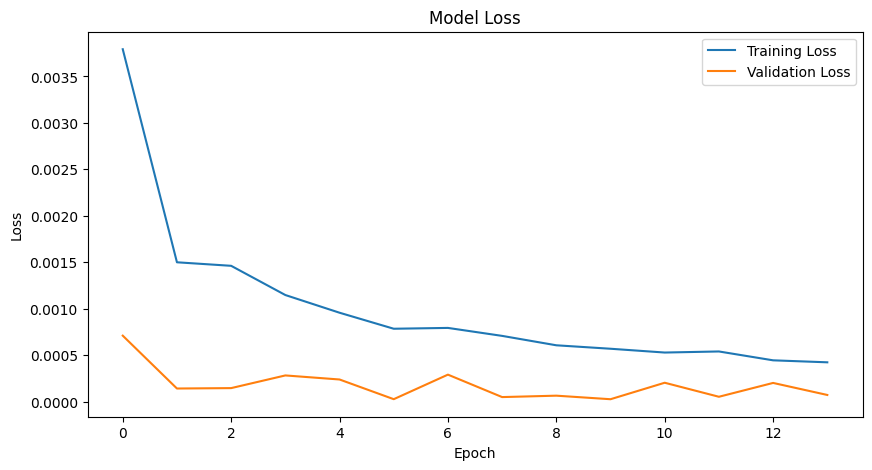

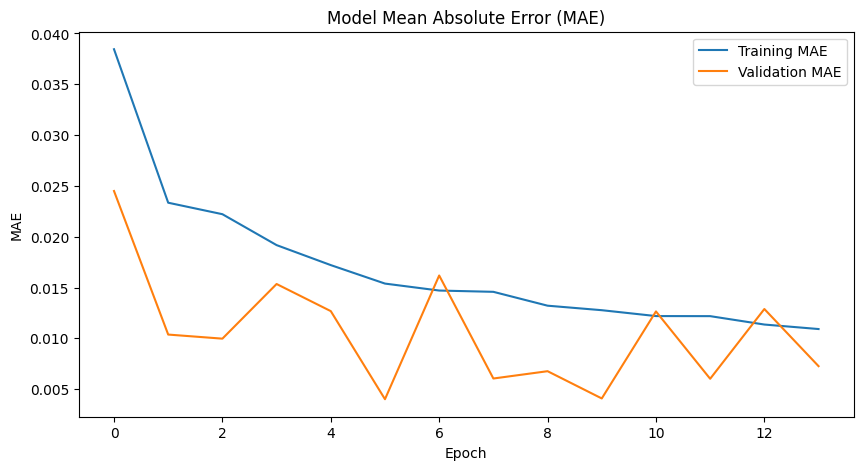

In [41]:
import matplotlib.pyplot as plt

# Ploting training & validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

# Ploting training & validation MAE
plt.figure(figsize=(10, 5))
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model Mean Absolute Error (MAE)')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()


77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step


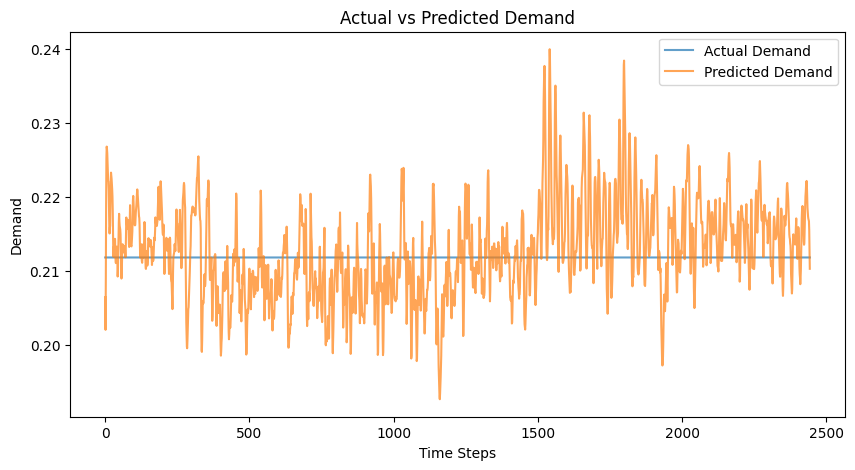

In [42]:
# Predictions
y_pred = model.predict(X_test_seq)

 ##Actual vs Predicted
plt.figure(figsize=(10, 5))
plt.plot(y_test_seq, label='Actual Demand', alpha=0.7)
plt.plot(y_pred, label='Predicted Demand', alpha=0.7)
plt.title('Actual vs Predicted Demand')
plt.ylabel('Demand')
plt.xlabel('Time Steps')
plt.legend(loc='upper right')
plt.show()


OTHER MODELS ATTEMPTS

model3 without start_station_id

In [16]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)

history = model3.fit(X_train_seq, y_train_seq, epochs=20, validation_data=(X_val_seq, y_val_seq), batch_size=32, callbacks=[early_stopping], verbose=1)


Epoch 1/20
543/543 ━━━━━━━━━━━━━━━━━━━━ 23s 37ms/step - loss: 0.2129 - mae: 0.3522 - val_loss: 0.1390 - val_mae: 0.2832
Epoch 2/20
543/543 ━━━━━━━━━━━━━━━━━━━━ 16s 30ms/step - loss: 0.1008 - mae: 0.2161 - val_loss: 0.1246 - val_mae: 0.2483
Epoch 3/20
543/543 ━━━━━━━━━━━━━━━━━━━━ 21s 32ms/step - loss: 0.0914 - mae: 0.1999 - val_loss: 0.1197 - val_mae: 0.2500
Epoch 4/20
543/543 ━━━━━━━━━━━━━━━━━━━━ 16s 30ms/step - loss: 0.0901 - mae: 0.1938 - val_loss: 0.1307 - val_mae: 0.2801
Epoch 5/20
543/543 ━━━━━━━━━━━━━━━━━━━━ 21s 30ms/step - loss: 0.0881 - mae: 0.1905 - val_loss: 0.1170 - val_mae: 0.2453
Epoch 6/20
543/543 ━━━━━━━━━━━━━━━━━━━━ 22s 33ms/step - loss: 0.0855 - mae: 0.1851 - val_loss: 0.1252 - val_mae: 0.2641
Epoch 7/20
543/543 ━━━━━━━━━━━━━━━━━━━━ 17s 32ms/step - loss: 0.0864 - mae: 0.1861 - val_loss: 0.1287 - val_mae: 0.2735
Epoch 8/20
543/543 ━━━━━━━━━━━━━━━━━━━━ 19s 30ms/step - loss: 0.0855 - mae: 0.1831 - val_loss: 0.1169 - val_mae: 0.2455
Epoch 9/20
543/543 ━━━━━━━━━━━━━━━━━━━━ 

In [17]:
test_loss, test_mae = model3.evaluate(X_test_seq, y_test_seq, verbose=0)
print(f"Test Loss: {test_loss}, Test MAE: {test_mae}")


Test Loss: 0.09274127334356308, Test MAE: 0.21883073449134827


76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step


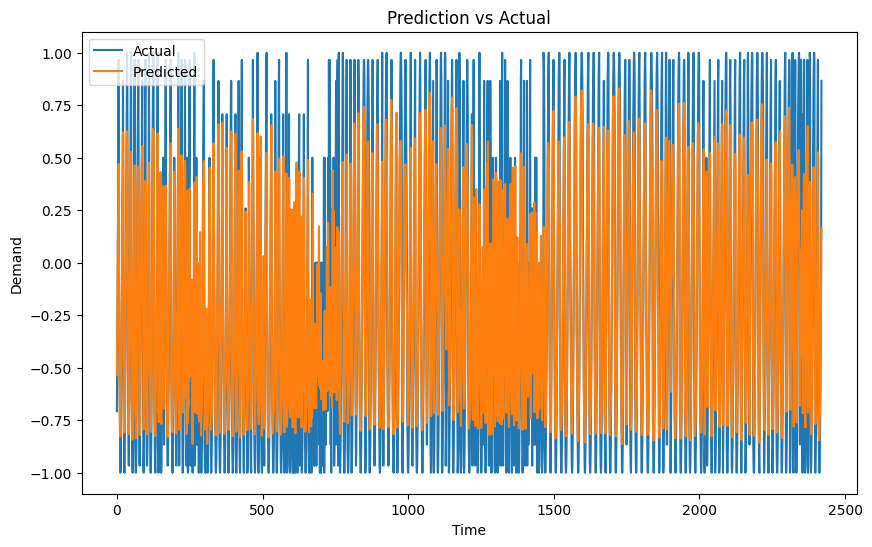

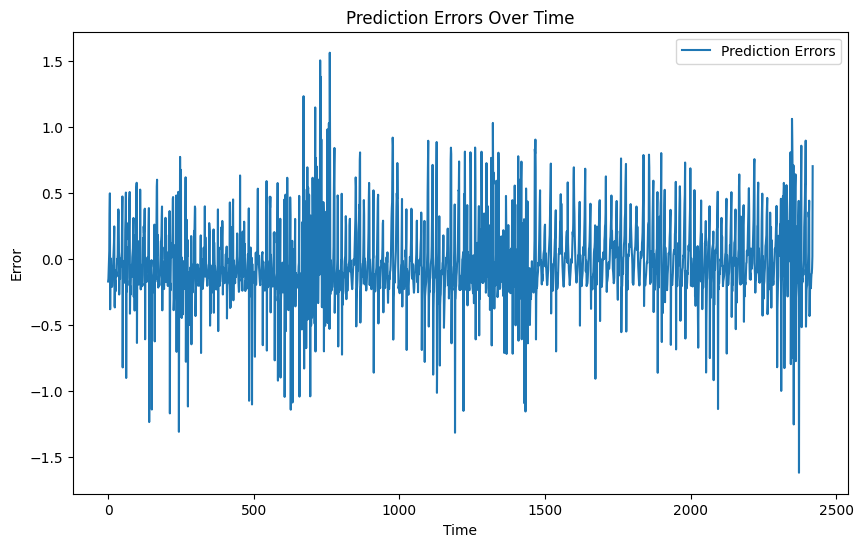

In [18]:
import matplotlib.pyplot as plt
predictions = model3.predict(X_test_seq)
errors = y_test_seq - predictions.squeeze()

# Plotting predictions vs. actuals
plt.figure(figsize=(10, 6))
plt.plot(y_test_seq, label='Actual')
plt.plot(predictions, label='Predicted')
plt.title('Prediction vs Actual')
plt.xlabel('Time')
plt.ylabel('Demand')
plt.legend()
plt.show()

#  errors
plt.figure(figsize=(10, 6))
plt.plot(errors, label='Prediction Errors')
plt.title('Prediction Errors Over Time')
plt.xlabel('Time')
plt.ylabel('Error')
plt.legend()
plt.show()


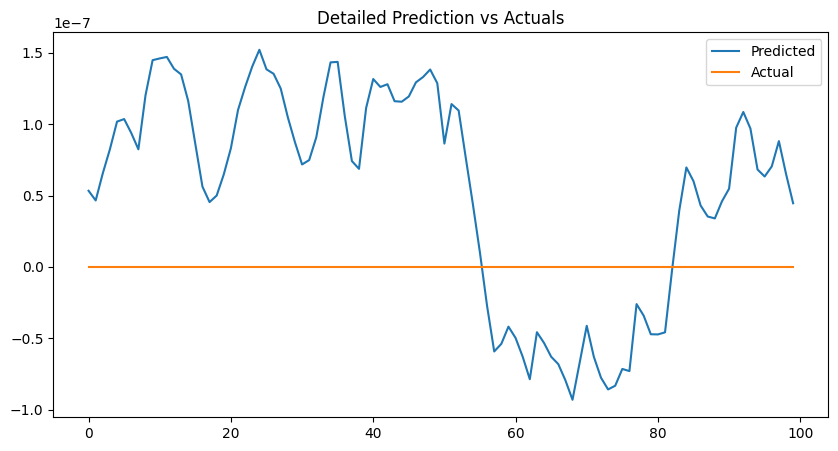

In [42]:
import matplotlib.pyplot as plt

##Detailed plot :
plt.figure(figsize=(10, 5))
plt.plot(predictions[:100], label='Predicted')
plt.plot(y_test_seq[:100], label='Actual')
plt.title('Detailed Prediction vs Actuals')
plt.legend()
plt.show()


In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, Conv1D, MaxPooling1D 
model3 = Sequential([
    Conv1D(64, kernel_size=3, activation='relu', input_shape=(lookback, X_train_seq.shape[2])),
    MaxPooling1D(pool_size=2),
    LSTM(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)
])

model3.compile(optimizer='adam', loss='mse', metrics=['mae'])

model3.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 70, 64)              │           2,752 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 35, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 37,889 (148.00 KB)

 Trainable params: 37,889 (148.00 KB)

 Non-trainable params: 0 (0.00 B)

In [42]:
pip install --upgrade tensorflow


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.4/615.4 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 53.0 MB/s eta 0:00:00
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.17.1
    Uninstalling tensorboard-2.17.1:
      Successfully uninstalled tensorboard-2.17.1
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.17.1
    Uninstalling tensorflow-2.17.1:
      Successfully uninstalled tensorflow-2.17.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.17.0 requires tensorflow<2.18,>=2.17, but you have tensorflow 2.18.0 which is incompatible.
